<a href="https://colab.research.google.com/github/jcpalaciosb/Predicion_de_ventas/blob/main/Copia_de_Prediccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODIGO PARA PREDICCION DE VENTAS**

**Objetivo:**

El objetivo de este proyecto es hacer una predicción de ventas para productos alimenticios vendidos en diversas tiendas.  El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

**PARTE 1**

1) Crea un repositorio GitHub que albergará el primer proyecto de portafolio. Sigan las instrucciones en el video de abajo para ayudarlos a completar esta tarea.

2) Usen Pandas para leer el conjunto de datos de predicción de ventas en un cuaderno de Google Colab y verifiquen los datos utilizando el comando df.head().

3) Agreguen el cuaderno de Google Colab al repositorio de GitHub.  Abran la pestaña de “archivo” y hagan clic en “Guardar copia en Github”.

* montaje y carga de datos

In [ ]:
import pandas as pd
filename="/content/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Diccionario de datos para este conjunto de datos:


 - **Item_Identifier**, identificación única del producto

 - **Item_Weight**, peso del producto

 - **Item_Fat_Content**, si el producto es bajo en grasa o regular

 - **Item_Visibility**, porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto

 - **Item_Type**, categoría a la que el producto pertenece

 - **Item_MRP**, precio máximo de venta al público (precio de catálogo) del producto

 - **Outlet_Identifier**, identificación única de la tienda

 - **Outlet_Establishment_Year**, el año en que se estableció la tienda

 - **Outlet_Size**, el tamaño de la tienda en cuanto al área total

 - **Outlet_Location_Type**, el tipo de área donde se encuentra la tienda

 - **Outlet_Type**, si el punto de venta es una tienda de comestibles o algún tipo de supermercado

 - **Item_Outlet_Sales**, ventas del producto en una tienda particular. Es la variable objetivo a predecir.

**PARTE 2 (base)**

Exploren los datos - ¿Qué necesitan para limpiar estos datos? ¡Límpienlos!  
Asegúrense de abordar cada una de las siguientes tareas:

1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
# 1) Cantidad de filas y columnas

In [ ]:
df.shape

(8523, 12)

In [ ]:
# 2) Tipo de datos en cada variable

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#3) Revision si hay duplicados

In [ ]:
df.columns.duplicated()   # revision en columnas

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
df.duplicated().sum()   # revision en filas

0

In [ ]:
# 4) Revisando la existencia de datos faltantes

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# 5 ) Valores faltantes a trabajar 

* Del resultado anterior, se identifica a las categorias "Item_Weight" e "Outlet_Size" como unicas con valores faltantes. En ambos casos ambas cantidades 1463 y 2410 respectivamente, no supera el 50% de la data y considerando que ademas contienen informacion posiblemente relevante para las
predicciones de venta y requerimiento de artificios de agrupamiento

In [ ]:
# Revision de la Categoria "Item_Weight":

* Esta categoria es del tipo flotante y contiene el peso de los productos, esta directamente relacionada a los datos del producto.

In [ ]:
df["Item_Weight"].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [ ]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
df["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

* Por los datos mostrados como valores unicos anterior, un valor adecuado en este caso para completar la data faltante es la mediana de la serie, por lo que se completara con la mediana de los valores existentes, ya que esta representa el valor que ocupa el lugar central de todos los datos de una serie y no seria necesario buscar alguna otra relacion con las otras columnas con datos de productos

In [ ]:
mediana = df['Item_Weight'].median()
df['Item_Weight'].fillna(mediana, inplace=True)
df['Item_Weight'].isna().sum()          # verificacion

0

In [ ]:
# Revision de la Categoria "Outlet_Size":
# Esta categoria es del tipo object y contiene el tipo de area donde se encuentra la tienda.

In [ ]:
df["Outlet_Size"].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [ ]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* En este caso, por los valores de la serie se ve que es una data alfanumerica indicando los tamaños de tienda (Medium, Small y High), por lo que no corresponde asignar algun valor estadistico como en el caso anteior a la data
faltante, por lo que se analizara el resto de la informacion relacionadas
con los outlets o tiendas.

* La identificacion de la tienda y el año en el que se establecio (Outlet_Identifier y Outlet_Establishment_Year) son datos basicamente de referencia identificatoria con mucha data que no ayudara a completar los datos

* las demas categorias (Outlet_Location_Type, Outlet_Type y Item_Outlet_Sales) si podrian tener alguna relacion con el tamaño de la tienda como para usarlos para completar la data faltante, lo que se vera a continuacion:

In [ ]:
df[["Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"]].head()      

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Medium,Tier 1,Supermarket Type1,3735.1380
1,Medium,Tier 3,Supermarket Type2,443.4228
2,Medium,Tier 1,Supermarket Type1,2097.2700
3,NaN,Tier 3,Grocery Store,732.3800
4,High,Tier 3,Supermarket Type1,994.7052


* Veamos las relaciones con el promedio de las ventas que son valores numericos 

In [ ]:
df.groupby(["Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"].mean()

Outlet_Size  Outlet_Location_Type  Outlet_Type      
High         Tier 3                Supermarket Type1    2298.995256
Medium       Tier 1                Supermarket Type1    2348.354635
             Tier 3                Supermarket Type2    1995.498739
                                   Supermarket Type3    3694.038558
Small        Tier 1                Grocery Store         340.329723
                                   Supermarket Type1    2277.844267
             Tier 2                Supermarket Type1    2438.841866
Name: Item_Outlet_Sales, dtype: float64

* Encabezaremos el agrupamiento con la categoria de mas valores, poniendo al final la de Tamaño

In [ ]:
df.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Size"])["Item_Outlet_Sales"].mean()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           340.329723
Supermarket Type1  Tier 1                Medium         2348.354635
                                         Small          2277.844267
                   Tier 2                Small          2438.841866
                   Tier 3                High           2298.995256
Supermarket Type2  Tier 3                Medium         1995.498739
Supermarket Type3  Tier 3                Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

* parece que el tipo de locacion no ayuda mucho, asi que no lo consideraremos y se evaluaran tanto juntas como por separado las otras dos:

In [ ]:
df.groupby(["Outlet_Location_Type","Outlet_Size"])["Item_Outlet_Sales"].mean()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium         2348.354635
                      Small          1576.192909
Tier 2                Small          2438.841866
Tier 3                High           2298.995256
                      Medium         2847.959679
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.groupby("Outlet_Size")["Item_Outlet_Sales"].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

* Se observa que los valores promedio del volumen de ventas en ambas categorias son similares relacionando a High con Tier 3, Medium con Tier 1 y Small con Tier 2 por lo tanto se completara los datos faltantes de la categoria Outlet_Size con el valor High, Medium o Small segun la tabla siguiente:

 - High, si el valor de ventas correspondiente esta entre 2,500 y mas dolares (similar a Tier 2)

 - Medium si el valor promedio de ventas esta entre 2,000 y 2,500)

 - Small si el valor del promedio de ventas correspondiente al indice de Outlet_Location_Type esta entre 0 y 2000 dolares

In [ ]:
largo = len(df["Outlet_Location_Type"])
x=0
for x in range(0,largo):
  valor = df["Outlet_Size"][x]
  ventas=df["Item_Outlet_Sales"][x]
  anterior=valor
  if valor=="High" or valor=="Medium" or valor=="Small":
     valor=anterior       # instruccion para poder usar el else 
  else:                   # para trabajar los datos faltantes
    if ventas<2000:
      valor="Small"
    elif ventas<=2500:
      valor="Medium"
    else:
      valor="High"
  df["Outlet_Size"]=df["Outlet_Size"].replace(anterior,valor)
  x=x+1

* revisamos si ya no hay datos faltantes:

In [ ]:
df["Outlet_Size"].isna().sum()

0

In [ ]:
# 6) Arreglo de alguna categoría inconsistente de datos:

In [ ]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

* Esta categoria tiene inconsistencia en los valores low fat, LF y reg que se procede a corregir

In [ ]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")

In [ ]:
# comprobacion:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
# 8) Obtencion de las estadísticas de una categoria resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**PARTE 3 (base)**

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

 - Histograma para ver las distribuciones de diversas características en el conjunto de datos.

 - Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

 - Mapa de calor de la correlación entre las características.

* carga de librerias adicionales a pandas para hacer lsa visualizaciones

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

* Se mostrara un histograma para mostrar la distribucion de los datos de todas las caracteristicas con informacion numerica:

 - Item_Weight                  (float64)
 - Item_Visibility              (float64)
 - Item_MRP                     (float64)
 - Outlet_Establishment_Year      (int64)
 - Item_Outlet_Sales            (float64)

* Para la visualizacion en Boxplot, se compararan las dos primeras (peso y veisibilidad) y la tercera y la ultimas (precios y ventas)

In [ ]:
# Histogramas

In [ ]:
lista=np.array(["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"])  # columnas a usar
colores=np.array(["blue", "red", "green", "yellow", "orange"])     # se dara un color a cada histograma

* Dado que los codigos son practiamente los mismos, se usara un bucle for para hacerlo

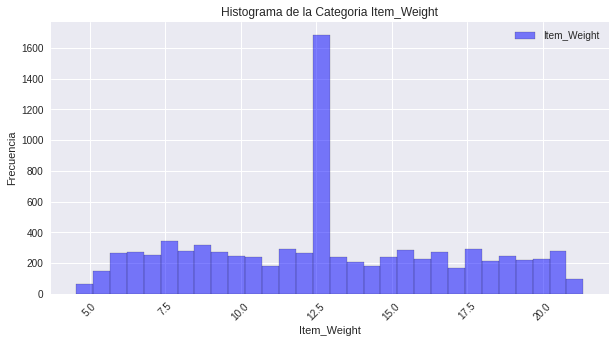

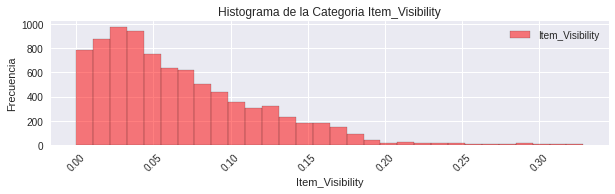

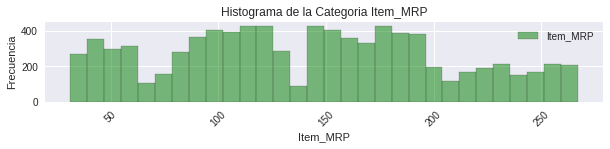

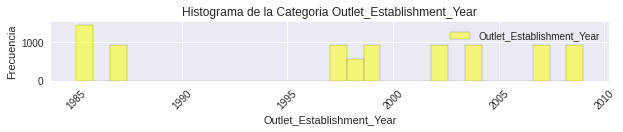

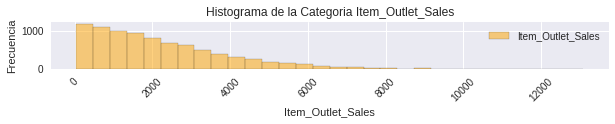

In [ ]:
for x in range(0, len(lista)):
  fig = plt.figure(figsize=(10, 5))
  plt.subplot(x+1, 1, 1)
  variable="Histograma de la Categoria "+lista[x]
  plt.title(variable)
  plt.xlabel(lista[x])     # agrega sub-titulo al eje x
  plt.ylabel("Frecuencia") # agrega sub-titulo al eje y
  plt.style.use('seaborn')
  df.loc[:, lista[x]].hist(bins = 30, legend=" ", color=colores[x], edgecolor='black', alpha=0.5) 
  plt.xticks(rotation = 45) # rotacion de los valores del eje x para que no se monten
  plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial

De los histogramas mostrados, podemos concluir que la categoria Item Weighs es la unica que presenta una distribucion normal con un desviacion estandar corta entre sus valores respecto a la media. 

Los histogramas de la categorias Item_Visibility e Item_Outlet_Sales estan sesgados hacia la derecha de la media.

El histograma de la categoria Item_MRP tambien es parecido a una distribucion normal tambien con desviacion estandar corta 

El histograma de la categoria Outlet_Establishment_Year, muestra un dispersion total de datos dado que se trata de años

In [ ]:
# Boxplots

* Pesos y Visibilidad:

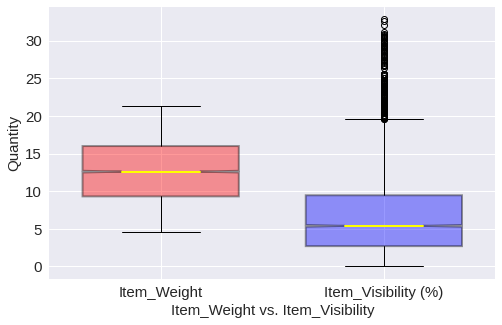

In [ ]:
peso = df.loc[:,"Item_Weight"]
visibilidad = np.array(df.loc[:,"Item_Visibility"])*100  # para llevar los indices a porcentajes para mejorar el boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([peso, visibilidad],
           notch = True,
           labels=["Item_Weight", "Item_Visibility (%)"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel("Item_Weight vs. Item_Visibility", fontsize = 15);
plt.ylabel("Quantity", fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

* Precios y Ventas:

La caracteristica Item_Visibililty se ha llevado a porcentajes para poder visualizar mejor ambas caracteristicas, en este caso nuevamente se refleja al igual que el histograma que la caracteristica Item_Weight presenta una distribicion normal de los datos con corta desviacion estandar. En cambio los datos de Item_Visibility tienden a ubicarse hacia la derecha. 

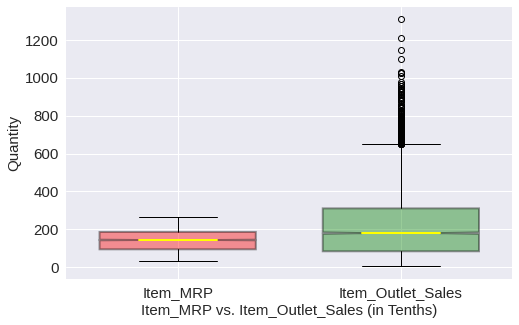

In [ ]:
precios = df.loc[:,"Item_MRP"]
ventas = np.array(df.loc[:,"Item_Outlet_Sales"])/10 # para trabajar las ventas en decimas
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([precios, ventas],
           notch = True,
           labels=["Item_MRP", "Item_Outlet_Sales"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel("Item_MRP vs. Item_Outlet_Sales (in Tenths)", fontsize = 15);
plt.ylabel("Quantity", fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

La caracteristica Item_Outlet_Sales se ha llevado a porcentajes para poder visualizar mejor ambas caracteristicas, en este caso nuevamente se refleja al igual que el histograma un sesgo de los datos hacia la derecha, en cambio la de Item_MRP muestra una distribicion normal de los datos con corta desviacion estandar. 

In [ ]:
# Mapa de calor de la correlación entre las características.

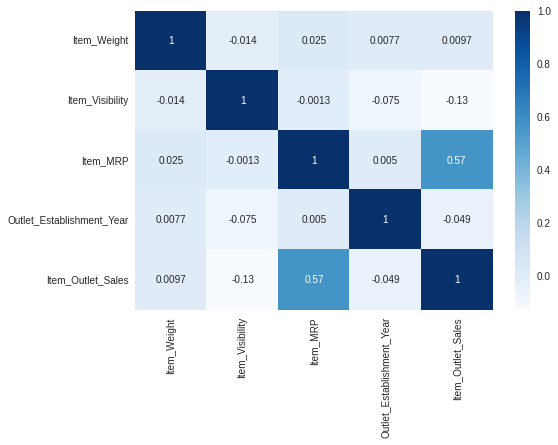

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

Del mapa de calor mostrado, podemos indicar que hay caracteristicas cuyos datos van en el mismo sentido que otros y otras en sentido contrario: sin embargo, respecto a los valores solo se encuentra una correlacion moderada entre las variables de precios y ventas, lo cual es razonable, ya que las ventas esta en funcion a los precios. Las demas variable no tienen correlacion ya que sus valores son menores a 0.3.